<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sklearn-v1.1-&amp;-Feature-Importance-Practice" data-toc-modified-id="Sklearn-v1.1-&amp;-Feature-Importance-Practice-1">Sklearn v1.1 &amp; Feature Importance Practice</a></span><ul class="toc-item"><li><span><a href="#Ingrid-Arbieto-Nelson" data-toc-modified-id="Ingrid-Arbieto-Nelson-1.1">Ingrid Arbieto Nelson</a></span></li><li><span><a href="#The-Task" data-toc-modified-id="The-Task-1.2">The Task</a></span></li><li><span><a href="#The-Data" data-toc-modified-id="The-Data-1.3">The Data</a></span></li></ul></li><li><span><a href="#Task" data-toc-modified-id="Task-2">Task</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-2.1">Imports</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2.2">Load Data</a></span></li><li><span><a href="#PreProcessing" data-toc-modified-id="PreProcessing-2.3">PreProcessing</a></span></li><li><span><a href="#Fit-&amp;-Evaluate-Tree-Based-Model" data-toc-modified-id="Fit-&amp;-Evaluate-Tree-Based-Model-2.4">Fit &amp; Evaluate Tree Based Model</a></span></li><li><span><a href="#Extract-&amp;-Plot-Feature-Importances" data-toc-modified-id="Extract-&amp;-Plot-Feature-Importances-2.5">Extract &amp; Plot Feature Importances</a></span><ul class="toc-item"><li><span><a href="#What-were-your-5-most-important-features?" data-toc-modified-id="What-were-your-5-most-important-features?-2.5.1">What were your 5 most important features?</a></span></li><li><span><a href="#What-does-it-mean-that-they-were-&quot;important&quot;?" data-toc-modified-id="What-does-it-mean-that-they-were-&quot;important&quot;?-2.5.2">What does it mean that they were "important"?</a></span></li></ul></li><li><span><a href="#Extract-&amp;-Plot-Permutation-Feature-Importances" data-toc-modified-id="Extract-&amp;-Plot-Permutation-Feature-Importances-2.6">Extract &amp; Plot Permutation Feature Importances</a></span><ul class="toc-item"><li><span><a href="#What-were-your-5-most-permutation-important-features?" data-toc-modified-id="What-were-your-5-most-permutation-important-features?-2.6.1">What were your 5 most permutation important features?</a></span></li><li><span><a href="#Are-they-the-same-features-that-your-model-has-as-the-top-5-important?" data-toc-modified-id="Are-they-the-same-features-that-your-model-has-as-the-top-5-important?-2.6.2">Are they the same features that your model has as the top 5 important?</a></span></li></ul></li></ul></li></ul></div>

## Sklearn v1.1 & Feature Importance Practice
---
* ### Ingrid Arbieto Nelson

### The Task
For this assignment, you will be building a machine learning model to predict car price using all of the provided features.

Specifically, you will:

* Preprocess the data as dataframes with feature names using the updated column transformer.
* Fit and evaluate a Tree Based Model of your choice.
  * Evaluate training and test data using R-squared and RMSE.
* Extract and Plot the Feature Importances calculated by your model.
  * Answer the Qs:
     * What were your 5 most important features?
     * What does it mean that they were "important"?
* Apply sklearn's permutation importance and visualize the permutation importances.
  * Answer the Qs:
     * What were your 5 most important features?
     * Are they the same features that your model has as the top 5 important?

### The Data
You will be using a modified version of the car price dataset from Kaggle (Original Source).
 * [Share Link](https://docs.google.com/spreadsheets/d/1AyMnL7WB89AmzSx-LSrnnuvGIHq45bC61lUJSbajz04/edit#gid=1205422684)
 * Direct Link: https://docs.google.com/spreadsheets/d/e/2PACX-1vSnWFRczgXa0AyKkbioX5Roq60X7GTAFilKtpFuAmyGi9uPMwdb51Jo-cpupDyjhT0EVqcNRJPINZ5b/pub?output=csv

## Task
### Imports

In [16]:
## Our standard import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

from sklearn.inspection import permutation_importance


# set random state for reproducibility
SEED = 321
np.random.seed(SEED)
plt.style.use(('ggplot','tableau-colorblind10'))

In [4]:
## set pandas to display more columns
pd.set_option('display.max_columns',50)

### Load Data

In [5]:
file = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSnWFRczgXa0AyKkbioX5Roq60X7GTAFilKtpFuAmyGi9uPMwdb51Jo-cpupDyjhT0EVqcNRJPINZ5b/pub?output=csv"
df = pd.read_csv(file)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [6]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### PreProcessing

In [7]:
# assign X and y
y = df['price']
X = df.drop(columns='price')

## train-test-split 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)
X_train.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
17,0,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,6,209,mpfi,3.62,3.39,8.0,182,5400,15,20
39,0,gas,std,four,sedan,fwd,front,96.5,175.4,65.2,54.1,2304,ohc,4,110,1bbl,3.15,3.58,9.0,86,5800,27,33
40,0,gas,std,four,sedan,fwd,front,96.5,175.4,62.5,54.1,2372,ohc,4,110,1bbl,3.15,3.58,9.0,86,5800,27,33
47,0,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,6,258,mpfi,3.63,4.17,8.1,176,4750,15,19
123,-1,gas,std,four,wagon,fwd,front,103.3,174.6,64.6,59.8,2535,ohc,4,122,2bbl,3.35,3.46,8.5,88,5000,24,30


In [8]:
## make pipelines for categorical vs numeric data
cat_sel = make_column_selector(dtype_include='object')
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))

num_sel = make_column_selector(dtype_include='number')
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))


## make the preprocessing column transformer with verbose_feature_names_out=False
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),
                                      verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001DD7F7384C0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001DD7F738370>)],
                  verbose_feature_names_out=False)

In [9]:
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

X_train_df = pd.DataFrame(preprocessor.transform(X_train), 
                          columns = feature_names, index = X_train.index)

X_test_df = pd.DataFrame(preprocessor.transform(X_test), 
                          columns = feature_names, index = X_test.index)
X_test_df.head(3)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
48,0.0,113.0,199.6,69.6,52.8,4066.0,6.0,258.0,3.63,4.17,8.1,176.0,4750.0,15.0,19.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
196,-2.0,104.3,188.8,67.2,56.2,2935.0,4.0,141.0,3.78,3.15,9.5,114.0,5400.0,24.0,28.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
148,0.0,96.9,173.6,65.4,54.9,2420.0,4.0,108.0,3.62,2.64,9.0,82.0,4800.0,23.0,29.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Fit & Evaluate Tree Based Model

In [10]:
def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    """Evaluates a scikit-learn-compatible regression model using r-squared and RMSE

    Args:
        model (Regressor): Regression Model with a .predict method
        X_train (DataFrame): Training Features
        y_train (Series): Training Target
        X_test (DataFrame): Test Features
        y_test (Series): Test Target
    """

    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

In [14]:
reg = RandomForestRegressor(random_state=SEED)
reg.fit(X_train_df,y_train)
print('Random Forest Regressor:')
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)

Random Forest Regressor:
Training Data:	R^2= 0.99	RMSE= 861.15
Test Data:	R^2= 0.93	RMSE= 2232.46


In [12]:
feature_importance = pd.Series(reg.feature_importances_, index=feature_names,
                        name='RandomForest Feature Importances')
feature_importance.head()

symboling    0.002039
wheelbase    0.036370
carlength    0.006514
carwidth     0.051535
carheight    0.003904
Name: RandomForest Feature Importances, dtype: float64

### Extract & Plot Feature Importances

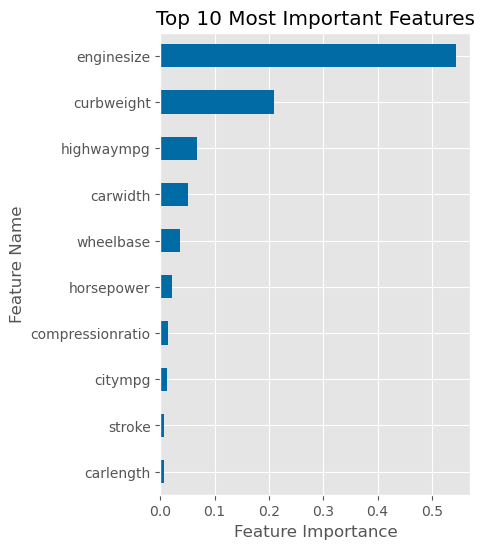

In [15]:
# plot top 10 most important features
ax = feature_importance.sort_values().tail(10).plot(kind='barh',figsize=(4,6))
ax.set(ylabel='Feature Name',xlabel='Feature Importance',
       title='Top 10 Most Important Features');

#### What were your 5 most important features?

* engine size
* curb weight
* highway mpg
* car width
* wheel base

#### What does it mean that they were "important"?

* An "important' feature is one that was used extensively by the model during the training process.
* Feature Importance does not indicate directionality.

### Extract & Plot Permutation Feature Importances

In [17]:
r = permutation_importance(reg, X_train_df, y_train ,n_repeats =5)
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [18]:
## can make the mean importances into a series
perm_importances = pd.Series(r['importances_mean'],index=X_train_df.columns,
                           name = 'permutation importance')
perm_importances.head()

symboling    0.001117
wheelbase    0.018727
carlength    0.003291
carwidth     0.014125
carheight    0.003046
Name: permutation importance, dtype: float64

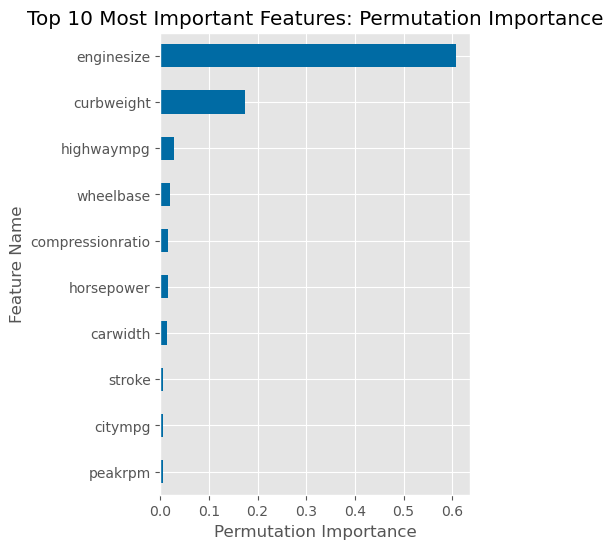

In [20]:
# plot top 10 most permutation important features
ax = perm_importances.sort_values().tail(10).plot(kind='barh',figsize=(4,6))
ax.set(ylabel='Feature Name',xlabel='Permutation Importance',
       title='Top 10 Most Important Features: Permutation Importance');

#### What were your 5 most permutation important features?

* engine size
* curb weight
* highway mpg
* wheel base
* compression ratio

#### Are they the same features that your model has as the top 5 important?

No, engine size, curb weight, and highway mpg are the same, but wheel base is now fourth, and new one is compression ratio, by permutation Importance.